# Training Notebook for Transformer
To be run using on the Google Colab servers

### Global setup

In [ ]:
import os
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from time import strftime

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

### Connect to Github repository and import code

In [ ]:
# RUN THIS ONCE AT THE START OF THE SESSION
# clone github repository
!git clone --single-branch --branch modern https://github.com/patrickmastorga/VQ-VAE-Tranformer-Image-Gen.git

# add repo to sys path to allow imports
import sys
sys.path.append('/content/VQ-VAE-Tranformer-Image-Gen')

In [ ]:
# RUN THIS AT THE START AS WELL AS EVERY TIME THE REPO IS UPDATED
# pull changes from github
%cd /content/VQ-VAE-Tranformer-Image-Gen
!git pull origin modern

# refrsh the imports
from importlib import reload
import TF.model
reload(TF.model)
import VQ.model
reload(VQ.model)

from VQ.model import Encoder, Decoder, Quantizer, VQ_VAE, LATENT_W, LATENT_H, NUM_EMBEDDINGS
from TF.model import TransformerPrior, VOCAB_SIZE, SEQ_LEN, BOS_ID

assert VOCAB_SIZE == NUM_EMBEDDINGS + 1
assert SEQ_LEN == LATENT_H * LATENT_W

### Load pretrained Decoder and CelebA embeddings

Loading dataset...
Loading VQ-VAE model...


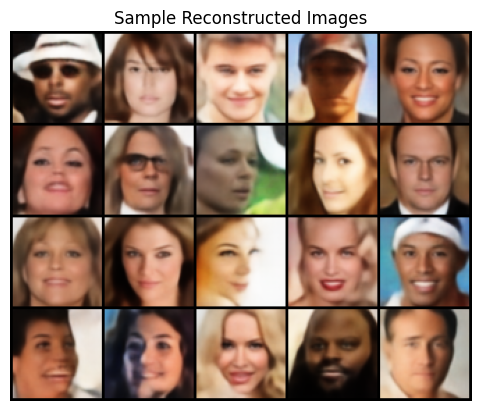

In [ ]:
INDICES_PATH = '/content/VQ-VAE-Tranformer-Image-Gen/VQ/model/celeba_indices_uint16.pt'
CHECKPOINT_PATH = '/content/VQ-VAE-Tranformer-Image-Gen/VQ/model/celeba_indices_uint16.pt'

# load CelebA embeddings dataset
print('Loading dataset...')
celeba_embeddings = torch.utils.data.TensorDataset(torch.load(INDICES_PATH))

# load VQ-VAE model parameters
print('Loading VQ-VAE model...')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
encoder = Encoder()
decoder = Decoder()
quantizer = Quantizer()
vq_vae = VQ_VAE(encoder, decoder, quantizer).to(device)
vq_vae.eval()

checkpoint = torch.load(CHECKPOINT_PATH, map_location=device)
vq_vae.load_state_dict(checkpoint['model_state'])

# visualize
grid_x = 5
grid_y = 4

samples = torch.stack([celeba_embeddings[i][0] for i in range(grid_x * grid_y)]).long().to(device)
images = vq_vae.reconstruct_from_indices(samples.view(-1, LATENT_W, LATENT_H))
img = torchvision.utils.make_grid(images, grid_x, normalize=True, value_range=(0, 1))

plt.title(f'Sample Reconstructed Images')
plt.axis('off')
plt.imshow(img.permute(1,2,0).cpu())

### Initialize Model and dataloader

In [ ]:
BATCH_SIZE = 256

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataloader = torch.utils.data.DataLoader(celeba_embeddings, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
model = TransformerPrior().to(device)

### Train model

Checkpoint loaded. Resuming from training step 15830.
04:01:49 Begin Training
04:01:53 TRAINING Step [15900/31660]; Loss: 4.612575
04:01:58 TRAINING Step [16000/31660]; Loss: 4.611795
Checkpoint saved at step 16000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


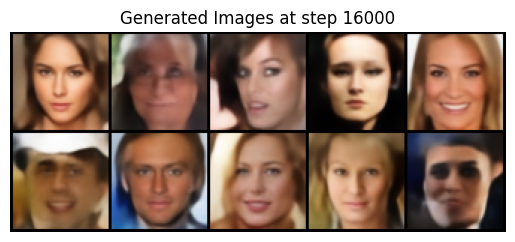

04:02:04 TRAINING Step [16100/31660]; Loss: 4.608733
04:02:09 TRAINING Step [16200/31660]; Loss: 4.613662
04:02:14 TRAINING Step [16300/31660]; Loss: 4.610758
04:02:19 TRAINING Step [16400/31660]; Loss: 4.616917
04:02:24 TRAINING Step [16500/31660]; Loss: 4.613888
04:02:29 TRAINING Step [16600/31660]; Loss: 4.614596
04:02:34 TRAINING Step [16700/31660]; Loss: 4.616513
04:02:40 TRAINING Step [16800/31660]; Loss: 4.612481
04:02:45 TRAINING Step [16900/31660]; Loss: 4.615084
04:02:50 TRAINING Step [17000/31660]; Loss: 4.620786
Checkpoint saved at step 17000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


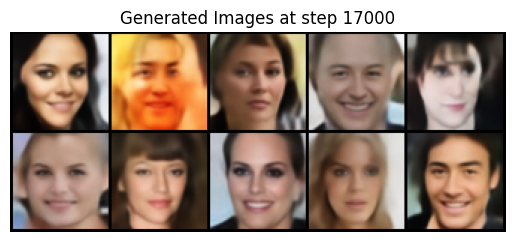

04:02:56 TRAINING Step [17100/31660]; Loss: 4.611054
04:03:01 TRAINING Step [17200/31660]; Loss: 4.609807
04:03:06 TRAINING Step [17300/31660]; Loss: 4.613538
04:03:11 TRAINING Step [17400/31660]; Loss: 4.613585
04:03:16 TRAINING Step [17500/31660]; Loss: 4.599410
04:03:21 TRAINING Step [17600/31660]; Loss: 4.601641
04:03:27 TRAINING Step [17700/31660]; Loss: 4.594994
04:03:32 TRAINING Step [17800/31660]; Loss: 4.603072
04:03:37 TRAINING Step [17900/31660]; Loss: 4.599597
04:03:42 TRAINING Step [18000/31660]; Loss: 4.600375
Checkpoint saved at step 18000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


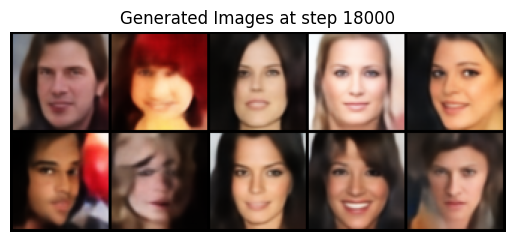

04:03:48 TRAINING Step [18100/31660]; Loss: 4.599202
04:03:53 TRAINING Step [18200/31660]; Loss: 4.597919
04:03:58 TRAINING Step [18300/31660]; Loss: 4.599385
04:04:03 TRAINING Step [18400/31660]; Loss: 4.598391
04:04:08 TRAINING Step [18500/31660]; Loss: 4.603497
04:04:13 TRAINING Step [18600/31660]; Loss: 4.597558
04:04:19 TRAINING Step [18700/31660]; Loss: 4.600176
04:04:24 TRAINING Step [18800/31660]; Loss: 4.601619
04:04:29 TRAINING Step [18900/31660]; Loss: 4.600182
04:04:34 TRAINING Step [19000/31660]; Loss: 4.598591
Checkpoint saved at step 19000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


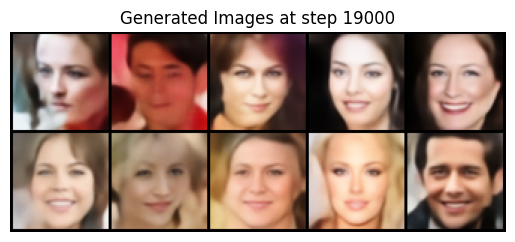

04:04:40 TRAINING Step [19100/31660]; Loss: 4.588221
04:04:45 TRAINING Step [19200/31660]; Loss: 4.584369
04:04:50 TRAINING Step [19300/31660]; Loss: 4.585696
04:04:55 TRAINING Step [19400/31660]; Loss: 4.583691
04:05:00 TRAINING Step [19500/31660]; Loss: 4.589773
04:05:06 TRAINING Step [19600/31660]; Loss: 4.584339
04:05:11 TRAINING Step [19700/31660]; Loss: 4.588783
04:05:16 TRAINING Step [19800/31660]; Loss: 4.585769
04:05:21 TRAINING Step [19900/31660]; Loss: 4.593080
04:05:26 TRAINING Step [20000/31660]; Loss: 4.590041
Checkpoint saved at step 20000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


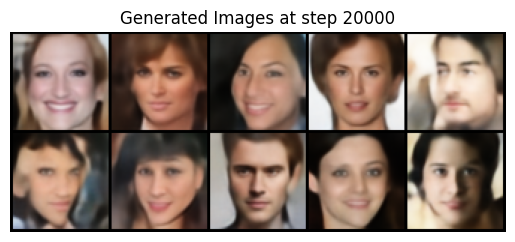

04:05:32 TRAINING Step [20100/31660]; Loss: 4.588414
04:05:37 TRAINING Step [20200/31660]; Loss: 4.591678
04:05:42 TRAINING Step [20300/31660]; Loss: 4.584104
04:05:47 TRAINING Step [20400/31660]; Loss: 4.584133
04:05:53 TRAINING Step [20500/31660]; Loss: 4.589252
04:05:58 TRAINING Step [20600/31660]; Loss: 4.585932
04:06:03 TRAINING Step [20700/31660]; Loss: 4.575221
04:06:08 TRAINING Step [20800/31660]; Loss: 4.574064
04:06:13 TRAINING Step [20900/31660]; Loss: 4.573655
04:06:18 TRAINING Step [21000/31660]; Loss: 4.577944
Checkpoint saved at step 21000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


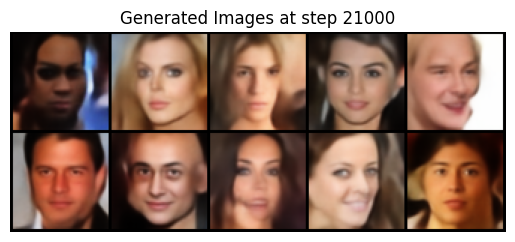

04:06:24 TRAINING Step [21100/31660]; Loss: 4.578920
04:06:29 TRAINING Step [21200/31660]; Loss: 4.578780
04:06:34 TRAINING Step [21300/31660]; Loss: 4.580672
04:06:40 TRAINING Step [21400/31660]; Loss: 4.573289
04:06:45 TRAINING Step [21500/31660]; Loss: 4.575597
04:06:50 TRAINING Step [21600/31660]; Loss: 4.574811
04:06:55 TRAINING Step [21700/31660]; Loss: 4.580351
04:07:00 TRAINING Step [21800/31660]; Loss: 4.578468
04:07:05 TRAINING Step [21900/31660]; Loss: 4.573719
04:07:10 TRAINING Step [22000/31660]; Loss: 4.576468
Checkpoint saved at step 22000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


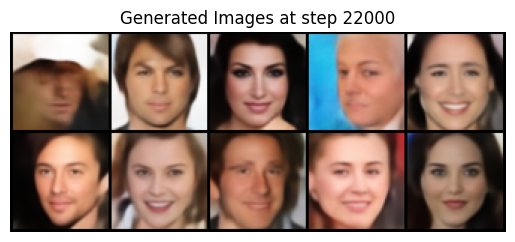

04:07:16 TRAINING Step [22100/31660]; Loss: 4.581418
04:07:21 TRAINING Step [22200/31660]; Loss: 4.569201
04:07:26 TRAINING Step [22300/31660]; Loss: 4.557642
04:07:32 TRAINING Step [22400/31660]; Loss: 4.569613
04:07:37 TRAINING Step [22500/31660]; Loss: 4.567075
04:07:42 TRAINING Step [22600/31660]; Loss: 4.562680
04:07:47 TRAINING Step [22700/31660]; Loss: 4.565337
04:07:52 TRAINING Step [22800/31660]; Loss: 4.568147
04:07:57 TRAINING Step [22900/31660]; Loss: 4.570993
04:08:02 TRAINING Step [23000/31660]; Loss: 4.567398
Checkpoint saved at step 23000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


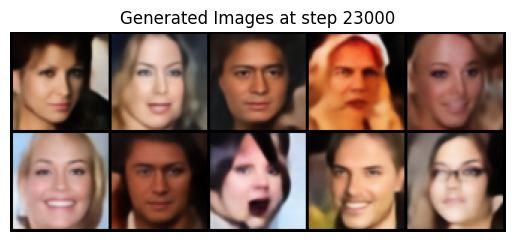

04:08:08 TRAINING Step [23100/31660]; Loss: 4.570979
04:08:13 TRAINING Step [23200/31660]; Loss: 4.565310
04:08:18 TRAINING Step [23300/31660]; Loss: 4.564889
04:08:24 TRAINING Step [23400/31660]; Loss: 4.568144
04:08:29 TRAINING Step [23500/31660]; Loss: 4.565668
04:08:34 TRAINING Step [23600/31660]; Loss: 4.568228
04:08:39 TRAINING Step [23700/31660]; Loss: 4.567569
04:08:44 TRAINING Step [23800/31660]; Loss: 4.563223
04:08:49 TRAINING Step [23900/31660]; Loss: 4.555883
04:08:55 TRAINING Step [24000/31660]; Loss: 4.553322
Checkpoint saved at step 24000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


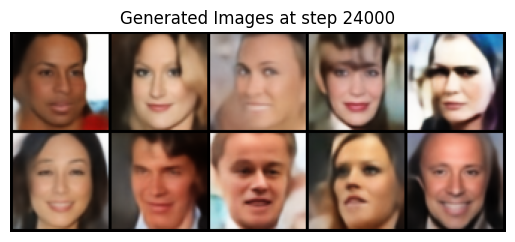

04:09:00 TRAINING Step [24100/31660]; Loss: 4.554289
04:09:05 TRAINING Step [24200/31660]; Loss: 4.555948
04:09:11 TRAINING Step [24300/31660]; Loss: 4.561199
04:09:16 TRAINING Step [24400/31660]; Loss: 4.555882
04:09:21 TRAINING Step [24500/31660]; Loss: 4.557205
04:09:26 TRAINING Step [24600/31660]; Loss: 4.562873
04:09:31 TRAINING Step [24700/31660]; Loss: 4.558181
04:09:36 TRAINING Step [24800/31660]; Loss: 4.561063
04:09:41 TRAINING Step [24900/31660]; Loss: 4.561578
04:09:47 TRAINING Step [25000/31660]; Loss: 4.558591
Checkpoint saved at step 25000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


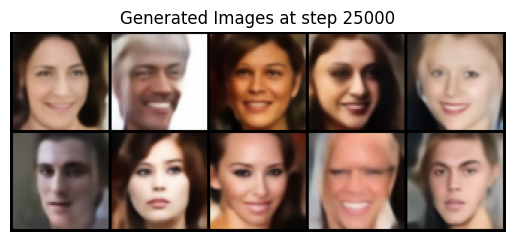

04:09:52 TRAINING Step [25100/31660]; Loss: 4.558301
04:09:57 TRAINING Step [25200/31660]; Loss: 4.555180
04:10:02 TRAINING Step [25300/31660]; Loss: 4.556504
04:10:08 TRAINING Step [25400/31660]; Loss: 4.545782
04:10:13 TRAINING Step [25500/31660]; Loss: 4.541560
04:10:18 TRAINING Step [25600/31660]; Loss: 4.543017
04:10:23 TRAINING Step [25700/31660]; Loss: 4.545375
04:10:28 TRAINING Step [25800/31660]; Loss: 4.547545
04:10:34 TRAINING Step [25900/31660]; Loss: 4.543694
04:10:39 TRAINING Step [26000/31660]; Loss: 4.549903
Checkpoint saved at step 26000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


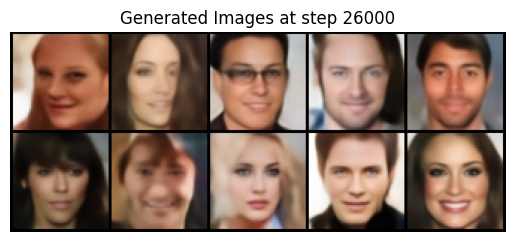

04:10:44 TRAINING Step [26100/31660]; Loss: 4.549795
04:10:50 TRAINING Step [26200/31660]; Loss: 4.550956
04:10:55 TRAINING Step [26300/31660]; Loss: 4.555945
04:11:00 TRAINING Step [26400/31660]; Loss: 4.549053
04:11:05 TRAINING Step [26500/31660]; Loss: 4.551707
04:11:10 TRAINING Step [26600/31660]; Loss: 4.550406
04:11:15 TRAINING Step [26700/31660]; Loss: 4.554028
04:11:20 TRAINING Step [26800/31660]; Loss: 4.553070
04:11:26 TRAINING Step [26900/31660]; Loss: 4.557093
04:11:31 TRAINING Step [27000/31660]; Loss: 4.532494
Checkpoint saved at step 27000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


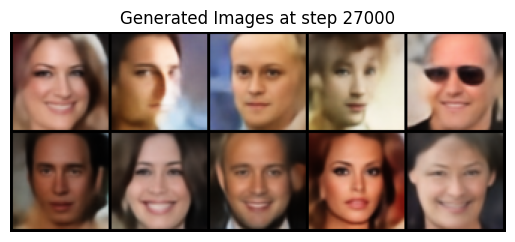

04:11:37 TRAINING Step [27100/31660]; Loss: 4.540624
04:11:42 TRAINING Step [27200/31660]; Loss: 4.534070
04:11:47 TRAINING Step [27300/31660]; Loss: 4.542384
04:11:52 TRAINING Step [27400/31660]; Loss: 4.540076
04:11:57 TRAINING Step [27500/31660]; Loss: 4.540048
04:12:02 TRAINING Step [27600/31660]; Loss: 4.541424
04:12:07 TRAINING Step [27700/31660]; Loss: 4.544513
04:12:13 TRAINING Step [27800/31660]; Loss: 4.541878
04:12:18 TRAINING Step [27900/31660]; Loss: 4.542165
04:12:23 TRAINING Step [28000/31660]; Loss: 4.544456
Checkpoint saved at step 28000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


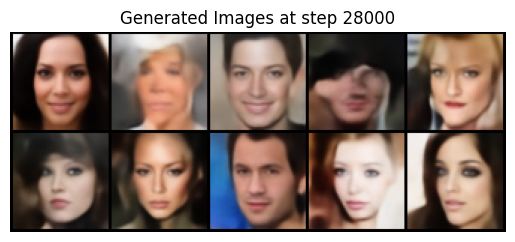

04:12:28 TRAINING Step [28100/31660]; Loss: 4.542907
04:12:34 TRAINING Step [28200/31660]; Loss: 4.544833
04:12:39 TRAINING Step [28300/31660]; Loss: 4.545285
04:12:44 TRAINING Step [28400/31660]; Loss: 4.539331
04:12:49 TRAINING Step [28500/31660]; Loss: 4.543313
04:12:54 TRAINING Step [28600/31660]; Loss: 4.528804
04:12:59 TRAINING Step [28700/31660]; Loss: 4.532790
04:13:05 TRAINING Step [28800/31660]; Loss: 4.531124
04:13:10 TRAINING Step [28900/31660]; Loss: 4.529785
04:13:15 TRAINING Step [29000/31660]; Loss: 4.532826
Checkpoint saved at step 29000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


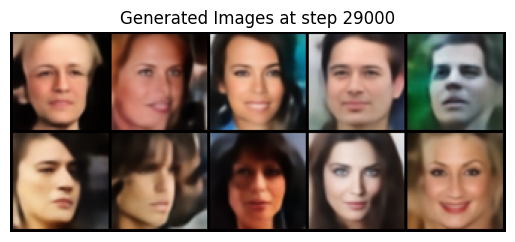

04:13:21 TRAINING Step [29100/31660]; Loss: 4.536464
04:13:26 TRAINING Step [29200/31660]; Loss: 4.532406
04:13:31 TRAINING Step [29300/31660]; Loss: 4.533618
04:13:36 TRAINING Step [29400/31660]; Loss: 4.537307
04:13:41 TRAINING Step [29500/31660]; Loss: 4.538249
04:13:46 TRAINING Step [29600/31660]; Loss: 4.532661
04:13:51 TRAINING Step [29700/31660]; Loss: 4.535973
04:13:57 TRAINING Step [29800/31660]; Loss: 4.534366
04:14:02 TRAINING Step [29900/31660]; Loss: 4.536634
04:14:07 TRAINING Step [30000/31660]; Loss: 4.536392
Checkpoint saved at step 30000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


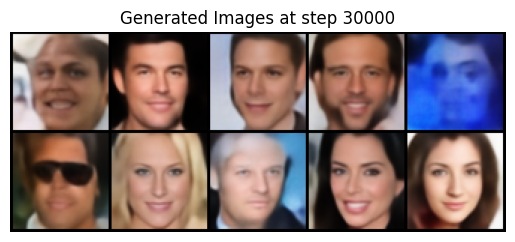

04:14:13 TRAINING Step [30100/31660]; Loss: 4.534256
04:14:18 TRAINING Step [30200/31660]; Loss: 4.524688
04:14:23 TRAINING Step [30300/31660]; Loss: 4.518698
04:14:28 TRAINING Step [30400/31660]; Loss: 4.524132
04:14:33 TRAINING Step [30500/31660]; Loss: 4.523559
04:14:38 TRAINING Step [30600/31660]; Loss: 4.528839
04:14:44 TRAINING Step [30700/31660]; Loss: 4.525019
04:14:49 TRAINING Step [30800/31660]; Loss: 4.524434
04:14:54 TRAINING Step [30900/31660]; Loss: 4.529337
04:14:59 TRAINING Step [31000/31660]; Loss: 4.526608
Checkpoint saved at step 31000 to /content/drive/MyDrive/transformer_models/checkpoint.pt


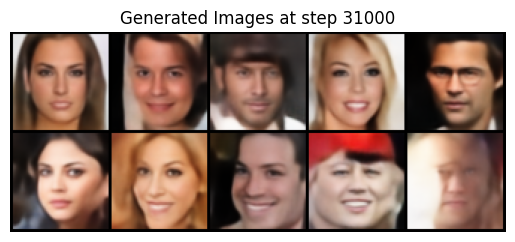

04:15:05 TRAINING Step [31100/31660]; Loss: 4.530577
04:15:10 TRAINING Step [31200/31660]; Loss: 4.528783
04:15:15 TRAINING Step [31300/31660]; Loss: 4.534485
04:15:20 TRAINING Step [31400/31660]; Loss: 4.526976
04:15:25 TRAINING Step [31500/31660]; Loss: 4.529392
04:15:30 TRAINING Step [31600/31660]; Loss: 4.532393
Checkpoint saved at step 31660 to /content/drive/MyDrive/transformer_models/checkpoint.pt


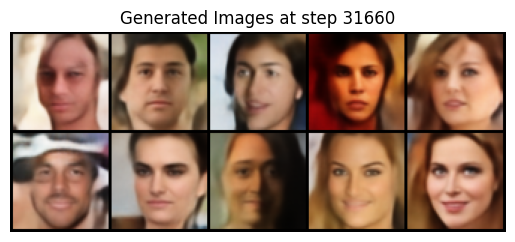

Training complete.


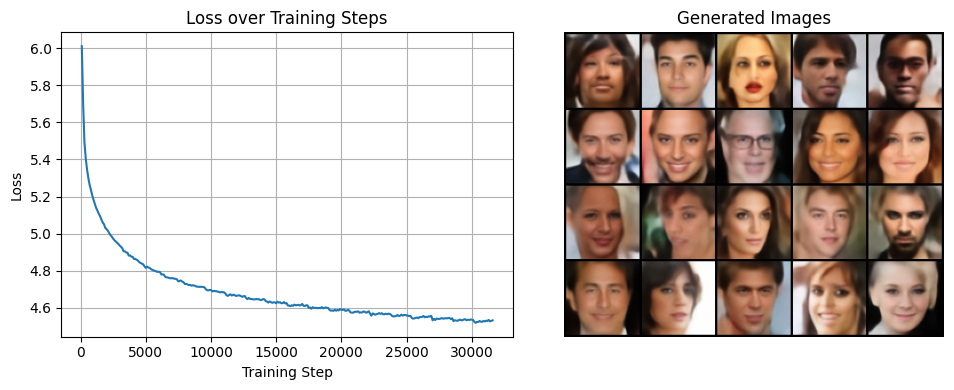

In [ ]:
# training hyperparameters
EPOCHS = 10
LEARNING_RATE = 2e-4
LOG_INTERVAL = 100
SAVE_INTERVAL = 1000
SAVE_PATH = '/content/drive/MyDrive/tf_models/tf16' # THE SUFFIX '_{training_step}.pt' will be appended

# optionally, resume training from a checkpoint
CONTINUE_FROM_CHECKPOINT = True #  # str | None
CHECKPOINT_PATH = '/content/drive/MyDrive/tf_models/tf16_17000.pt'

# optmizer and training state vars
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
train_state = {
    'losses': [],
    'logging_steps': [],
    'running_loss': 0.0,
    'steps': 0
}

# load from checkpoint
if CONTINUE_FROM_CHECKPOINT:
    train_state = torch.load(CHECKPOINT_PATH, map_location=device)
    model.load_state_dict(train_state['model_state'])
    optimizer.load_state_dict(train_state['optmiizer_state'])
    print(f'Checkpoint loaded. Resuming from training step {train_state['steps']}.')


# training loop
print(f'{strftime('%H:%M:%S')} Begin Training')
end_step = train_state['steps'] + len(dataloader) * EPOCHS
model.train()
for epoch in range(EPOCHS):
    for batch_idx, batch in enumerate(dataloader):
        # training step
        targets, = batch
        targets = targets.to(device).long()
        inputs = torch.empty_like(targets)
        inputs[:, 0] = BOS_ID
        inputs[:, 1:] = targets[:, :-1]

        logits = model(inputs)
        loss = nn.functional.cross_entropy(
            logits.view(-1, VOCAB_SIZE),
            targets.view(-1)
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_state['steps'] += 1
        train_state['steps'] += loss.item()

        # logging step
        if train_state['steps'] % LOG_INTERVAL == 0:
            avg_loss = train_state['steps'] / LOG_INTERVAL
            train_state['steps'] = 0.0
            train_state['losses'].append(avg_loss)
            print(f'{strftime('%H:%M:%S')} TRAINING Step [{train_state['steps']}/{end_step}]; Loss: {avg_loss:.6f}')

        # saving step
        if train_state['steps'] % SAVE_INTERVAL == 0 or (epoch == EPOCHS - 1 and batch_idx == len(dataloader) - 1):
            train_state['model_state'] = model.state_dict()
            train_state['optmiizer_state'] = optimizer.state_dict()
            model_save_path = f'{SAVE_PATH}_{train_state['steps']}.pt'
            torch.save(train_state, model_save_path)
            print(f'{strftime('%H:%M:%S')} Checkpoint saved at step {train_state['steps']} to {model_save_path}')

            # visualize reconstructions
            grid_x = 5
            grid_y = 2

            model.eval()
            samples = model.generate(grid_x * grid_y)
            model.train()

            images = vq_vae.reconstruct_from_indices(samples.view(-1, LATENT_W, LATENT_H))
            img = torchvision.utils.make_grid(images, grid_x, normalize=True, value_range=(0, 1))

            plt.title(f'Generated Images at step {train_state['steps']}')
            plt.axis('off')
            plt.imshow(img.permute(1,2,0).cpu())
            plt.show()

print(f'Training complete.')

# Prepare reconstructions
grid_x = 5
grid_y = 4

model.eval()
samples = model.generate(grid_x * grid_y)

images = vq_vae.reconstruct_from_indices(samples.view(-1, LATENT_W, LATENT_H))
img = torchvision.utils.make_grid(images, grid_x, normalize=True, value_range=(0, 1))

# Side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Loss curves
axes[0].plot(train_state['logging_steps'], train_state['losses'])

axes[0].set_xlabel('Training Step')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss over Training Steps')
axes[0].grid(True)

# Reconstructions
axes[1].imshow(img.permute(1, 2, 0).cpu())
axes[1].set_title('Generated Images')
axes[1].axis('off')

plt.tight_layout()
plt.show()